In [80]:
import matplotlib.pylab as plt

In [2]:
import numpy as np

In [4]:
EPSILON = 1e-8

In [5]:
def plane_intersection(ray, plane):
    ''' Find the intersection point between a ray and a plane
            ray: tuple (A, u) starting point and direction
            plane: tuple (P, n, ux) origin, normal direction and in-plane x-axis
            
        Returns:
            coordinates of the intersection point in the 3D ref. frame
            coordinates of the intersection point in the plane ref. frame (u, v)
    '''
    A, u = ray
    P, n, plane_x = plane
    
    A, P = np.asarray(A), np.asarray(P)
    u, n, plane_x = np.asarray(u), np.asarray(n), np.asarray(plane_x)
    
    u_dot_n = np.inner(u, n)
    AP_dot_n = np.inner(P - A, n)
    
    if u_dot_n >= -EPSILON and AP_dot_n >= -EPSILON:    
        # print('do not colide')
        return None, None
    else:
        t = AP_dot_n / u_dot_n  # time of collision
        B = A + u*t   # collision point
        
        plane_y = np.cross(n, plane_x)
        proj_x = np.inner(plane_x, B-P)
        proj_y = np.inner(plane_y, B-P)
        return B, (proj_x, proj_y)

# test
A = (1.2, 0, 0)
u = (-1, 0, 0)
ray = (A, u)

P = (0, 0, 0)
n = (1, 1, 4)
plane_x = (-1, 1, 0)
plane = (P, n, plane_x)

assert np.allclose(plane_intersection(ray, plane)[0], [0., 0., 0.])


In [106]:
N = 1000
A = np.random.rand(N, 3)
u = .1 * np.random.rand(N, 3)
u[:, 0] += -.08
A[:, 0] += 3

plane_center = np.array((0, 0, 0))
plane_normal = np.array((1, 0, 0)) 

AP_dot_n = np.inner((A - plane_center), plane_normal)

u_dot_n = np.inner(u, plane_normal)

t = - AP_dot_n / u_dot_n
B = A + u*t[:, np.newaxis]

In [107]:
B[t<0] = np.NaN

In [108]:
B

array([[4.44089210e-16, 1.11293925e+01, 1.56056396e+01],
       [0.00000000e+00, 9.11126742e+00, 1.56688789e+00],
       [0.00000000e+00, 9.22568888e+01, 1.33334641e+01],
       ...,
       [           nan,            nan,            nan],
       [0.00000000e+00, 2.27418086e+00, 2.39775102e+00],
       [0.00000000e+00, 5.17459275e+00, 3.47261945e+00]])

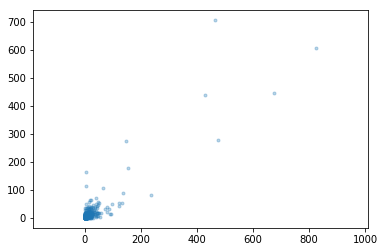

In [109]:
plt.plot(B[:, 1], B[:, 2], '.', alpha=.3)
plt.axis('equal');

In [ ]:
A, u = ray
plane_n, plane_x = plane

A, P = np.asarray(A), np.asarray(P)
u, n, plane_x = np.asarray(u), np.asarray(n), np.asarray(plane_x)

u_dot_n = np.inner(u, n)
AP_dot_n = np.inner(P - A, n)

if u_dot_n >= -EPSILON and AP_dot_n >= -EPSILON:    
    # print('do not colide')
    return None, None
else:
    t = AP_dot_n / u_dot_n  # time of collision
    B = A + u*t   # collision point

    plane_y = np.cross(n, plane_x)
    proj_x = np.inner(plane_x, B-P)
    proj_y = np.inner(plane_y, B-P)
    return B, (proj_x, proj_y)

https://www.mathcurve.com/courbes2d/ellipse/ellipse.shtml

eq polaire d'une ellipse

In [114]:
def get_xy(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

In [115]:
theta = np.linspace(-np.pi, np.pi, 111)

In [116]:
a, b = 1, .6
p = b**2/a
e = np.sqrt(a**2 - b**2)/a

In [153]:
rho_1 =  a*b/np.sqrt( b**2*np.cos(theta)**2 + a**2*np.sin(theta)**2 )

rho_2 = p/(1 + e*np.cos(theta))

rho_3 = a*2*a*np.cos(theta)/(1 - e**2*np.cos(theta)**2)

d = 10
theta_0 = np.pi/10 + 3
alpha = np.pi/9 + 8
cosBeta = np.sin(alpha) * np.cos(theta)
rho_4 = cosBeta + np.sqrt( cosBeta**2 + d**2 * np.tan(theta_0)**2 )
rho_5 = cosBeta - np.sqrt( cosBeta**2 + d**2 * np.tan(theta_0)**2 )

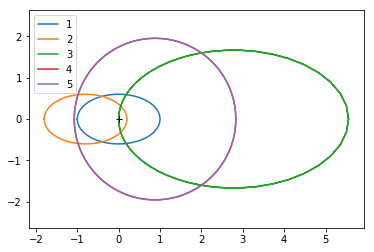

In [154]:
plt.plot(*get_xy(theta, rho_1), label='1');
plt.plot(*get_xy(theta, rho_2), label='2');
plt.plot(*get_xy(theta, rho_3), label='3');
plt.plot(*get_xy(theta, rho_4), label='4');
plt.plot(*get_xy(theta, rho_5), label='5');

plt.axis('equal'); plt.legend();
plt.plot(0, 0, '+k');

In [155]:
import sympy as sp

ImportError: No module named 'sympy'